<h1><center> Information Visualization Project </center></b>
<center> CSE3044 </center></b>
<center> Slot: L55 + L56 </center></h1>

<h2><center>CONSUMER ANALYSIS<center> </h2>

<h3>1. Motivation</h3><br>
Consider a firm owing multiple branches across a country. The firm decides to analyse its customer in order to find most suitable place to open a new branch and understand the customer behaviour. It will not only help in aiming maximum profit but the firm can serve the customers in more efficient ways.

<h3>2. Data Information</h3><br>
This dataset is composed by the following Seven features:<br>
CustomerID: Unique ID assigned to the customer<br>
Gender: Gender of the customer.<br>
City: Name of the city, customer lives in.<br>
Age: Age of the customer.<br>
Annual Income: Annual Income of the customer. <br>
Credit Score: Amount of credit firm can give to a particular customer. <br>
Spending Score (1-100): Score assigned by the mall based on customer behavior and spending nature.


<h3>3. Dependences</h3>
Here we can find the libraries we will use in order to develop a solution for this problem.

**numpy|pandas:** Will help us treat and explore the data, and execute vector and matrix operations. <br>
**matplotlib|seaborn:** Will help us plot the information so we can visualize it in different ways and have a better understanding of it. <br>
**plotly:** Will also help us plotting data in a fancy way.<br>
**sklearn:** Will provide all necessary tools to train our models and test them afterwards.<br>

In [32]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans

<h3>4. Data Exploration</h3>

In this section we are doing a little bit of data exploration, checking for null values, object data types and other things we might consider in order to keep our data clean and well structured.

In [33]:
df = pd.read_csv("Shopping_CustomerData.csv")
df.head()

,CustomerID,CustomerGender,CustomerAge,CustomerCity,AnnualIncome,CreditScore,SpendingScore,CustomerCityID
0,1001,Male,49,Bengaluru,527547.58850,653,78,1
1,1002,Male,59,Bengaluru,207143.19760,630,63,1
2,1003,Female,54,Delhi,164423.84570,555,69,4
3,1004,Female,42,Bengaluru,56220.36443,699,30,1
4,1005,Female,30,Bengaluru,256194.36190,793,6,1


In [34]:
df.shape

(200, 8)

As you can see, column names are quite complex. So we will be renaming them to simplier names, to make the dataset more accessible.


In [35]:
df = df.rename(columns={'CustomerID':'cid','CustomerGender':'gender','CustomerAge':'age','CustomerCity':'city','AnnualIncome': 'annualincome','CreditScore':'credscore', 'Spendingscore': 'spendingscore'})

In [36]:
df.head()

,cid,gender,age,city,annualincome,credscore,SpendingScore,CustomerCityID
0,1001,Male,49,Bengaluru,527547.58850,653,78,1
1,1002,Male,59,Bengaluru,207143.19760,630,63,1
2,1003,Female,54,Delhi,164423.84570,555,69,4
3,1004,Female,42,Bengaluru,56220.36443,699,30,1
4,1005,Female,30,Bengaluru,256194.36190,793,6,1


Now, we will check for null values in the dataset.

In [37]:
df.isna().sum()

cid               0
gender            0
age               0
city              0
annualincome      0
credscore         0
SpendingScore     0
CustomerCityID    0
dtype: int64

To understand the dataset in more better way, we need to identify the datatypes of all the variables.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cid             200 non-null    int64  
 1   gender          200 non-null    object 
 2   age             200 non-null    int64  
 3   city            200 non-null    object 
 4   annualincome    200 non-null    float64
 5   credscore       200 non-null    int64  
 6   SpendingScore   200 non-null    int64  
 7   CustomerCityID  200 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 12.6+ KB


As you can see, Gender is non numeric. We might face complexities while visualising gender.
So, we will convert gender to numeric data as Male=0, Female =1

In [39]:
#Replacing objects for numerical values
df['gender']=df.gender.astype(object)
df['gender'].replace(to_replace = ['Female', 'Male'], value =[0,1], inplace=True)
df.gender

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: gender, Length: 200, dtype: int64

As you can see, City is also non numeric.So, we will convert City to numeric data as Bengaluru=1, Chennai=2,Delhi=3,Kolkata=4,Mumbai=5

In [40]:
df['city']=df.city.astype(object)
df['city'].replace(to_replace = ['Bengaluru', 'Chennai','Delhi','Kolkata','Mumbai'], value =[1,2,3,4,5], inplace=True)
df.city

0      1
1      1
2      3
3      1
4      1
      ..
195    3
196    1
197    2
198    3
199    2
Name: city, Length: 200, dtype: int64

# Gender Analysis

In [41]:
a = df.groupby('gender').cid.nunique()
print(a)

gender
0    112
1     88
Name: cid, dtype: int64


<AxesSubplot:title={'center':'Gender Analysis'}, xlabel='gender'>

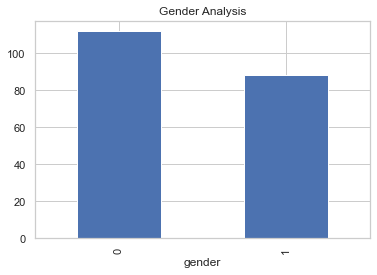

In [42]:
a.plot.bar(x="Female", y="male", title="Gender Analysis")

# Age Analysis

In [43]:
b = df.groupby('age').cid.nunique()

# Credit Score Analysis

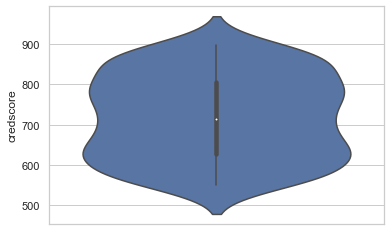

In [44]:
sns.set_theme(style="whitegrid")
ax = sns.violinplot(y=df["credscore"])

In [45]:
df['credscore'].describe()

count    200.000000
mean     719.975000
std      104.578236
min      551.000000
25%      628.250000
50%      715.000000
75%      806.250000
max      897.000000
Name: credscore, dtype: float64

Text(0, 0.5, 'Number of people')

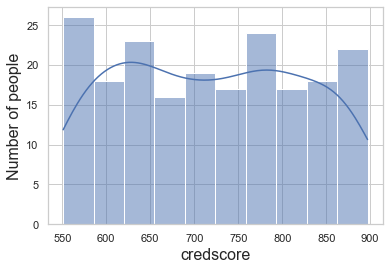

In [46]:
ax = sns.histplot(x = df["credscore"], bins = 10, kde=True)
plt.xlabel('credscore', fontsize=16)
plt.ylabel('Number of people', fontsize = 16)

# Spending Score Analysis

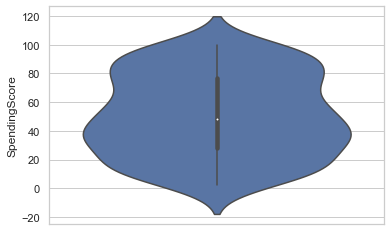

In [47]:
ax = sns.violinplot(y = df["SpendingScore"])

In [48]:
df['SpendingScore'].describe()

count    200.00000
mean      50.70500
std       28.72269
min        2.00000
25%       27.75000
50%       48.00000
75%       77.00000
max      100.00000
Name: SpendingScore, dtype: float64

Text(0, 0.5, 'Number of people')

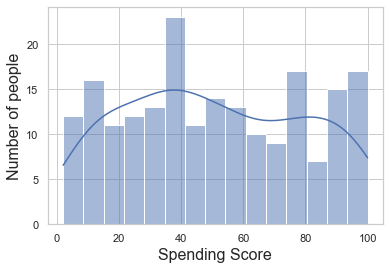

In [49]:
ax = sns.histplot(x = df["SpendingScore"], bins = 15, kde=True)
plt.xlabel('Spending Score', fontsize=16)
plt.ylabel('Number of people', fontsize = 16)

# City Analysis

In [52]:
text = open(r"C:\Users\ARYA\Desktop\IV\bar.csv","r")
d = dict()

for line in text:
    line = line.strip()
    line = line.lower()
    words = line.split(" ")
    
    for word in words:
        if word in d:
            d[word] = d[word] + 1
        else:
            d[word] = 1

for key in list(d.keys()):
    print(key, ":", d[key])

customercity : 1
bengaluru : 50
delhi : 37
chennai : 45
mumbai : 39
kolkata : 29


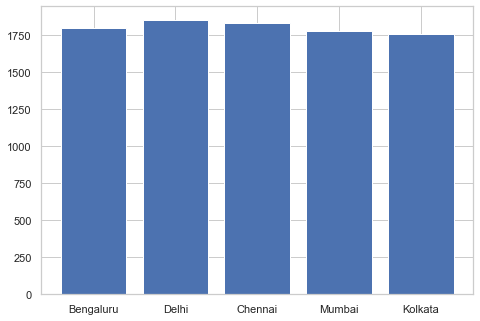

In [53]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
a = [1795,1849,1826,1773,1755]
b = ["Bengaluru", "Delhi","Chennai","Mumbai","Kolkata"]
ax.bar(b,a)
plt.show()
text.close()

# Annual Income Analysis

In [54]:
import numpy as np
x = np.random.randint(low=0, high=700000, size=10000)

# Compute frequency and bins
frequency, bins = np.histogram(x, bins=20, range=[0, 700000])

# Pretty Print
for b, f in zip(bins[1:], frequency):
    print(round(b, 1), ' '.join(np.repeat('',f)))

35000.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
70000.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

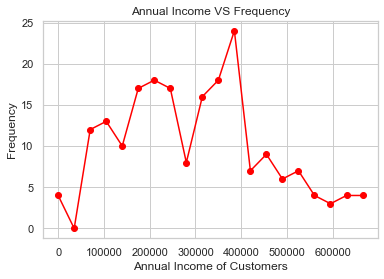

In [55]:
import matplotlib.pyplot as plt
Annual_Income = [0,35000,70000,105000,140000,175000,210000,245000,280000,315000,350000,385000,420000,455000,490000,525000,560000,595000,630000,665000]
Frequency = [4,0,12,13,10,17,18,17,8,16,18,24,7,9,6,7,4,3,4,4]

plt.plot(Annual_Income,Frequency,color = 'red', marker = 'o')
plt.title("Annual Income VS Frequency")
plt.xlabel('Annual Income of Customers')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Spending Score Versus Annual Income

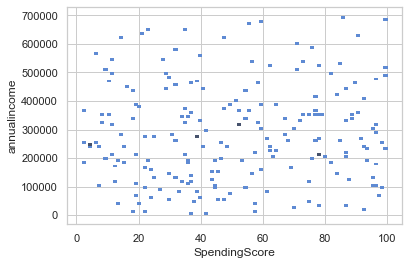

In [56]:
ax = sns.histplot(x = df["SpendingScore"],y = df["annualincome"], bins = 100)
#plt.xlabel('Credit Score', fontsize=16)
#plt.ylabel('Number of people', fontsize = 16)

# Annual Income versus Spending Score


<AxesSubplot:ylabel='Frequency'>

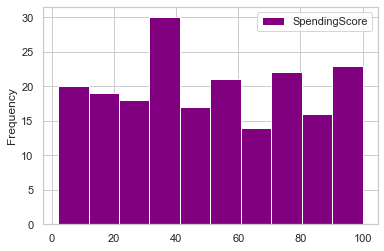

In [57]:
df.plot(x = 'annualincome', y = 'SpendingScore',color ='purple', kind = 'hist')

# Age versus spending score


Text(0, 0.5, 'Spending Score')

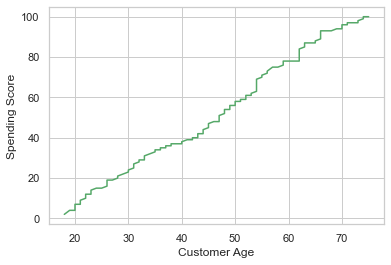

In [58]:
age =[18,18,18,19,19,20,20,20,20,21,21,21,21,21,22,22,22,22,22,22,22,23,23,23,23,23,24,25,26,26,26,26,26,27,27,27,28,28,28,29,29,29,29,30,30,30,30,31,31,31,32,32,33,33,33,33,33,34,34,34,34,35,35,36,36,37,37,37,37,38,38,38,38,38,39,39,40,40,41,41,41,42,42,42,43,43,43,43,44,44,44,45,45,45,45,45,45,45,46,46,47,47,47,47,47,48,48,48,48,48,48,49,49,49,49,50,50,50,50,50,51,51,52,52,52,52,53,53,53,53,54,54,54,54,54,54,54,55,55,55,55,56,56,56,57,58,58,59,59,59,59,59,59,59,60,61,61,61,62,62,62,62,62,62,62,63,63,63,63,64,65,65,65,65,66,66,66,66,66,66,66,67,68,69,70,70,70,71,71,72,72,73,73,73,74,74,74,74,74,75]

spend = [2,2,2,4,4,4,6,6,7,7,8,8,9,9,10,10,11,11,11,11,12,12,13,13,14,14,15,15,16,18,18,18,19,19,19,19,20,20,21,22,22,22,22,23,23,24,24,25,25,27,28,29,29,30,30,30,31,32,32,32,32,33,34,34,35,35,35,35,36,36,36,36,37,37,37,37,37,38,39,39,39,39,40,40,40,41,41,42,42,44,44,45,45,45,46,46,47,47,48,48,48,49,50,50,51,52,52,52,53,54,54,54,55,55,56,56,57,57,57,58,58,59,59,59,59,61,61,62,62,62,63,64,64,67,67,68,69,70,70,71,71,72,73,73,75,75,75,76,76,77,77,77,77,78,78,78,78,78,78,79,80,82,82,84,84,85,85,86,87,87,87,87,87,88,89,89,90,91,91,92,93,93,93,94,94,96,96,96,97,97,97,97,97,98,99,99,100,100,100,100]

plt.plot(age, spend,color = 'g')
plt.xlabel('Customer Age')
plt.ylabel('Spending Score')

##Not a Straight line. SLight modification in data can get it straight

# GENDER VS SPENDING SCORE

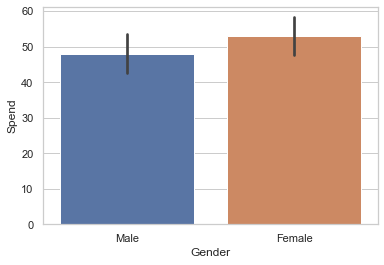

In [59]:
import seaborn
import pandas
import matplotlib.pyplot as plt
csv = pandas.read_csv(r'C:\Users\ARYA\Desktop\IV\bar5.csv')
res = sns.barplot(x='Gender', y='Spend', data=csv);

# City versus Annual Income

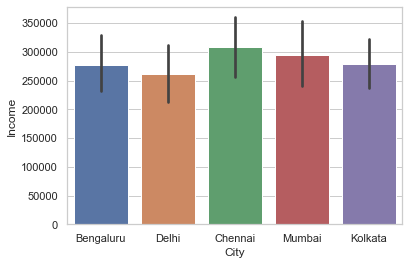

In [60]:
csv = pandas.read_csv(r'C:\Users\ARYA\Desktop\IV\bar4.csv')
res = sns.barplot(x='City', y='Income', data=csv);

# Age versus Annual Income

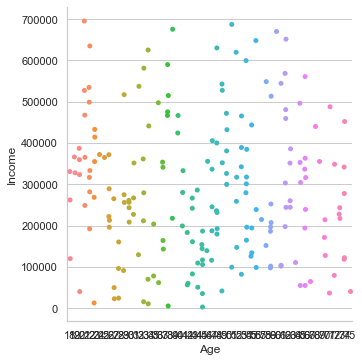

In [62]:
csv = pandas.read_csv(r'C:\Users\ARYA\Desktop\IV\bar3.csv')
res = seaborn.catplot(x="Age", y="Income", data=csv)


**CLUSTERING OF DATA USING K-MEANS CLUSTERING**

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

**Reading the Dataset**

In [65]:
df = pd.read_csv(r"C:\Users\ARYA\Desktop\IV\bar_H.csv")
df

,CreditScore,SpendingScore
0,653,78
1,630,63
2,555,69
3,699,30
4,793,6
...,...,...
195,601,52
196,554,58
197,844,36
198,837,24


**Plotting the data**

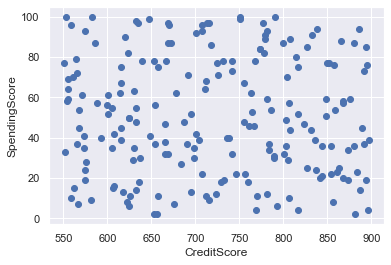

In [69]:
plt.scatter(df['CreditScore'],df['SpendingScore'])
plt.xlabel('CreditScore')
plt.ylabel('SpendingScore')
plt.show()

**Clustering**

We first select the features by copying them into another dataset. And then we choose to cluster them into 2 groups at first.

In [70]:
x = df.copy()

In [71]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

**To obtain results of the clustering**

In [72]:
clusters = x.copy()
clusters['Cluster_Prediction'] = kmeans.fit_predict(x)

**Plotting the clustered data**

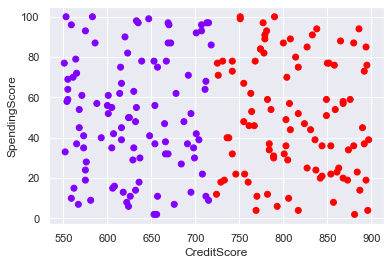

In [79]:
plt.scatter(clusters['CreditScore'],clusters['SpendingScore'],c = clusters['Cluster_Prediction'],cmap = 'rainbow')
plt.xlabel('CreditScore')
plt.ylabel('SpendingScore')
plt.show()

**We then standardize the variables**

In [74]:
from sklearn import preprocessing
x_sc = preprocessing.scale(x)
x_sc

array([[-0.64203672,  0.95267867],
       [-0.86251966,  0.42913296],
       [-1.58148576,  0.63855125],
       [-0.20107085, -0.72266759],
       [ 0.70003332, -1.56034072],
       [-0.81458859,  1.61583657],
       [ 1.54362021, -1.69995291],
       [ 1.26561999,  0.91777562],
       [-0.11479492, -1.00189197],
       [-0.48865729,  1.61583657],
       [-0.97755424, -1.31601939],
       [-1.0158991 ,  0.39422992],
       [-0.08603628,  0.46403601],
       [-0.87210588, -0.75757064],
       [ 0.4220331 ,  0.08010249],
       [ 1.534034  , -0.51324931],
       [ 0.08651559, -1.14150416],
       [ 0.79589547, -0.0595097 ],
       [ 0.93010247,  0.84796953],
       [ 0.51789525,  1.16209695],
       [-0.45989865,  1.2668061 ],
       [-0.27776057, -0.47834626],
       [-0.48865729,  1.2668061 ],
       [-1.58148576,  0.46403601],
       [ 0.5562401 ,  1.09229086],
       [-0.92962316,  1.09229086],
       [ 0.59458496,  0.28952078],
       [-1.26514068,  0.21971468],
       [-0.34486407,

**The elbow method**

In [75]:
array_time = []
for i in range(1,50):
    kmeans = KMeans(i)
    kmeans.fit(x_sc)
    array_time.append(kmeans.inertia_)
array_time

C:\Users\ARYA\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[399.9999999999998,
 247.54135837577272,
 142.31312280316146,
 96.78173768481963,
 80.13961299954097,
 67.57393398822079,
 56.841020068677025,
 47.92155133906619,
 41.861359569302635,
 37.166967018675486,
 33.71399363423259,
 30.989684607615473,
 26.687787777619437,
 24.63894627155112,
 23.302268347601974,
 21.165190186857508,
 20.464853299618177,
 18.10478586114319,
 16.79994124358942,
 16.785412700800645,
 14.941879147422462,
 14.003582280479524,
 13.58108581406379,
 12.572413466078991,
 11.679493697254735,
 10.952834070113632,
 10.595773789135485,
 10.099969110226688,
 9.4681975587185,
 8.917593729175579,
 8.784483403812864,
 8.380784608857173,
 8.017378050189182,
 7.648270482967835,
 7.12624202696374,
 6.833211260677515,
 6.5010485083940655,
 6.2361454993837215,
 5.90516861787682,
 5.918433855678286,
 5.629179933596639,
 5.337176528632654,
 5.258325547845119,
 4.983809257110219,
 4.806310705330068,
 4.6242956946254115,
 4.290513791914263,
 4.270168868303306,
 4.114177578769632]

**Visualizing the elbow method**

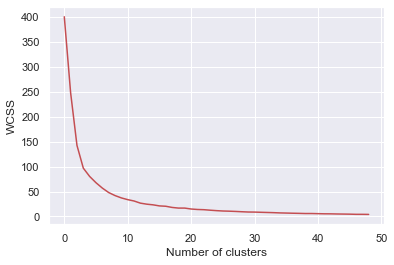

In [76]:
plt.plot(array_time,color="r")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Clustering new groups**

In [77]:
kmeans_new = KMeans(4)
kmeans.fit(x_sc)
cluster_new = x.copy()
cluster_new['Cluster_Prediction'] = kmeans_new.fit_predict(x_sc)
cluster_new

,CreditScore,SpendingScore,Cluster_Prediction
0,653,78,2
1,630,63,2
2,555,69,2
3,699,30,0
4,793,6,1
...,...,...,...
195,601,52,2
196,554,58,2
197,844,36,1
198,837,24,1


**Plotting the new cluster**

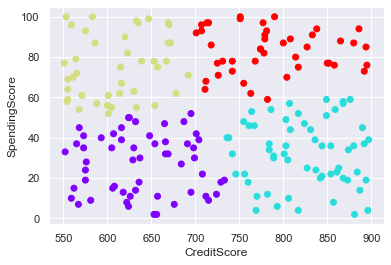

In [78]:
plt.scatter(cluster_new['CreditScore'],cluster_new['SpendingScore'], c = cluster_new['Cluster_Prediction'], cmap = 'rainbow')
plt.xlabel('CreditScore')
plt.ylabel('SpendingScore')
plt.show()

**Importing Datasets for KNN**

In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_csv(r"C:\Users\ARYA\Desktop\IV\bar_H.csv")

**Using head and finding shape of the dataset**

In [81]:
df.head()

,CreditScore,SpendingScore
0,653,78
1,630,63
2,555,69
3,699,30
4,793,6


In [82]:
df.shape

(200, 2)

**We are storing all rows and first 4 columns in x and the column values in y.**

In [83]:
x = df.iloc[:,:4].values
y = df['CreditScore'].values

**Using a test_size=0.2 means that we will take 80% of the data for the model and 20% of the data for testing. We will use random_state so that we get the same split every time.**

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=42)

**Calculate Euclidean Distance**

In [85]:
def distance(pa,pb):
    return np.sum((pa-pb)**2)**0.5

**Using KNN distance**

In [86]:
def KNN(x, y, x_query, k=5):
    m = x.shape[0]
    #get 100 values
    
    distances = []
    
    #iterate over all examples
    for i in range(m):
        dis = distance(x_query, x[i]) 
        print(x[i],x_query)
        distances.append((dis, y[i]))

    
    # sort
    distances = sorted(distances)
    
    #take top 5
    distances = distances[:k]
    
    #convert to numpy to extract data
    distances = np.array(distances)
    
    labels = distances[:, 1]
    
    uniq_label, counts = np.unique(labels, return_counts=True)
    pred = uniq_label[counts.argmax()]
    
    return (pred)

**We will define another function named KNN. Here the x_query is the new example for which we want to find the label/class.**

In [87]:
KNN(x_train, y_train, x_test[23], k=7)   #k is the number of loops ; the number of time we want the code to run

[897  39] [678  62]
[844  36] [678  62]
[715  97] [678  62]
[778  82] [678  62]
[695  13] [678  62]
[601  52] [678  62]
[698  35] [678  62]
[774  84] [678  62]
[887  14] [678  62]
[742  73] [678  62]
[553 100] [678  62]
[657  75] [678  62]
[635  97] [678  62]
[630  35] [678  62]
[806  10] [678  62]
[760  18] [678  62]
[636  18] [678  62]
[616  67] [678  62]
[890  45] [678  62]
[861  23] [678  62]
[725  77] [678  62]
[814  80] [678  62]
[774  84] [678  62]
[711  64] [678  62]
[789  30] [678  62]
[857   8] [678  62]
[704  39] [678  62]
[676   7] [678  62]
[625  50] [678  62]
[707  96] [678  62]
[701  42] [678  62]
[808  89] [678  62]
[742  32] [678  62]
[731  78] [678  62]
[620  90] [678  62]
[606  15] [678  62]
[782  59] [678  62]
[567   7] [678  62]
[575  19] [678  62]
[667  78] [678  62]
[555  69] [678  62]
[873  19] [678  62]
[751 100] [678  62]
[770  11] [678  62]
[784  34] [678  62]
[654  56] [678  62]
[827  85] [678  62]
[575  93] [678  62]
[559  96] [678  62]
[868  20] [678  62]


654.0

**Predicting labels for the entire test data set and store it in a list.**

In [88]:
prediction = []
for i in range(30):
    p = KNN(x_train, y_train, x_test[i], k =7)
    prediction.append(p)

[897  39] [616  45]
[844  36] [616  45]
[715  97] [616  45]
[778  82] [616  45]
[695  13] [616  45]
[601  52] [616  45]
[698  35] [616  45]
[774  84] [616  45]
[887  14] [616  45]
[742  73] [616  45]
[553 100] [616  45]
[657  75] [616  45]
[635  97] [616  45]
[630  35] [616  45]
[806  10] [616  45]
[760  18] [616  45]
[636  18] [616  45]
[616  67] [616  45]
[890  45] [616  45]
[861  23] [616  45]
[725  77] [616  45]
[814  80] [616  45]
[774  84] [616  45]
[711  64] [616  45]
[789  30] [616  45]
[857   8] [616  45]
[704  39] [616  45]
[676   7] [616  45]
[625  50] [616  45]
[707  96] [616  45]
[701  42] [616  45]
[808  89] [616  45]
[742  32] [616  45]
[731  78] [616  45]
[620  90] [616  45]
[606  15] [616  45]
[782  59] [616  45]
[567   7] [616  45]
[575  19] [616  45]
[667  78] [616  45]
[555  69] [616  45]
[873  19] [616  45]
[751 100] [616  45]
[770  11] [616  45]
[784  34] [616  45]
[654  56] [616  45]
[827  85] [616  45]
[575  93] [616  45]
[559  96] [616  45]
[868  20] [616  45]


**Putting all possible predictions in an array**

In [89]:
predictions = np.array(prediction)
print(predictions)

[605. 863. 575. 789. 774. 805. 555. 568. 774. 854. 647. 814. 784. 695.
 601. 854. 654. 868. 774. 684. 606. 708. 863. 654. 608. 803. 606. 733.
 784. 868.]


**To compute accuracy we will compare the y_test values with the predicted values. We use sum to get the count of true predictions.**

In [91]:
(y_test[:100] == predictions).sum()/len(predictions)

0.968


**Hence accuracy obtained is 0.968**